<a href="https://colab.research.google.com/github/GuangyuNie/MAE_598_Optimization/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P1.**

Show stationry point of $f(x1,x2) = 2x_1^2 - 4x_1x_2 + 1.5x_2^2 + x_2$ is a saddle

\begin{equation}
\begin{aligned}
\frac{\partial f}{\partial x} = \begin{bmatrix}4x_1 - 4x_2 \\ -4x_1 + 3x_2 + 1 \end{bmatrix} \\
\end{aligned}
\end{equation}

Let $\frac{\partial f}{\partial x}$ = 0, we have: \\

\begin{equation}
\begin{aligned}
x_2 = 1\\
x_1 = 1\\
\end{aligned}
\end{equation}
\begin{equation}
\begin{aligned}
Hf(x_1,x_2)|_{x_1=1,x_2=1} &= \begin{bmatrix}4& -4 \\ -4 & 3  \end{bmatrix} \\
\end{aligned}
\end{equation}

$Hf$ evaluated at $x_1 = 1$ and $x_2 = 1$ is indefinite matrix, thus this stationary point is a saddle point

   
  
\begin{equation}
\begin{aligned}
f(x_1,x_2) - f(1,1) = \nabla \frac{\partial f}{\partial x}|_{x_1=1,x_2=1} \begin{bmatrix}x_1 - 1 \\ x_2-1  \end{bmatrix}\\+ \frac{1}{2} \begin{bmatrix}x_1 - 1 \\ x_2-1 \end{bmatrix}^T  Hf|_{x_1=1,x_2=1} \begin{bmatrix}x_1 - 1 \\ x_2-1 \end{bmatrix} < 0 \\
(2x_1 - 3x_2 + 1)(2x_1-x_2-1) < 0
\end{aligned}
\end{equation}  

Thus, either $2x_1 - 3x_2 + 1 < 0 $ and $2x_1-x_2-1 > 0 $ or   
$2x_1 - 3x_2 + 1 > 0 $ and $2x_1-x_2-1 < 0 $ 




**P2**

\begin{equation}
\begin{aligned}
\min_{x_1,x_2,x_3} &(x_1+1)^2 + x_2^2 + (x_3-1)^2 \\
s.t. &x_1 + 2x_2 + 3x_3 = 1 \\
\end{aligned}
\end{equation}

You can substitute the constraint into the equation, which will turn the optimization problem into an unconstraint problem, which will give a convex set. we calculate the hession to see if this is a convex function:

\begin{equation}
\begin{aligned}
f(x_2,x_3) = &(2-2x_2-3x_3)^2 + x_2^2 + (x_3-1)^2  \\
= &5 x_2^2 + 12 x_3 x_2 - 8 x_2 + 10 x_3^2 - 14 x_3 + 5
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
\nabla f(x_2,x_3) = \begin{bmatrix}10x_2 + 12x_2 - 8 \\ 12x_2 + 20x_3 - 14 \end{bmatrix}
\end{aligned}
\end{equation}
Which leads to x_2 = -1/7, x_3 = 11/14, x_1 = -15/14

\begin{equation}
\begin{aligned}
Hf(x_2,x_3)|x_1, x_2, x_3 = \begin{bmatrix} 10& 12 \\ 12& 20 \end{bmatrix}
\end{aligned}
\end{equation}

The hessian matrix for f(x_2, x_3) have a eigenvalue of 28 and 2, thus the hessian is positive definite, which means the function is convex.

initial x is: [1, 1]
steps: 10, Loss:0.1753, x1: -1.0717, x2: 0.0986, x3: 0.6249
steps: 20, Loss:0.0841, x1: -1.0714, x2: -0.0587, x3: 0.7296
steps: 30, Loss:0.0730, x1: -1.0714, x2: -0.1135, x3: 0.7661
steps: 40, Loss:0.0716, x1: -1.0714, x2: -0.1326, x3: 0.7789
steps: 50, Loss:0.0715, x1: -1.0714, x2: -0.1393, x3: 0.7833
steps: 60, Loss:0.0714, x1: -1.0714, x2: -0.1416, x3: 0.7849
steps: 70, Loss:0.0714, x1: -1.0714, x2: -0.1424, x3: 0.7854
steps: 80, Loss:0.0714, x1: -1.0714, x2: -0.1427, x3: 0.7856
steps: 90, Loss:0.0714, x1: -1.0714, x2: -0.1428, x3: 0.7857
steps: 100, Loss:0.0714, x1: -1.0714, x2: -0.1428, x3: 0.7857


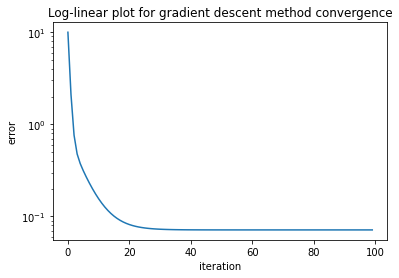

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

def get_x1(x):
  return 1 - 2*x[0] - 3*x[1]

init_x = [1,1]
print('initial x is: {}'.format(init_x))
lr = 0.05
total_L = []
for i in range(100):
  L = obj(init_x)
  grad_x = grad(init_x)
  init_x[0] += -lr*grad_x[0]
  init_x[1] += -lr*grad_x[1]
  total_L.append(L)
  if (i+1) % 10 == 0:
    print('steps: {}, Loss:{:.4f}, x1: {:.4f}, x2: {:.4f}, x3: {:.4f}'.format(i+1, L, get_x1(init_x), init_x[0], init_x[1]))

plt.yscale('log')
plt.plot(total_L)
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('Log-linear plot for gradient descent method convergence')
plt.show()


initial x is: [1, 1]
steps: 10, Loss:0.0715, x1: -1.0743, x2: -0.1417, x3: 0.7859
steps: 20, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 30, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 40, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 50, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 60, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 70, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 80, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 90, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857
steps: 100, Loss:0.0714, x1: -1.0714, x2: -0.1429, x3: 0.7857


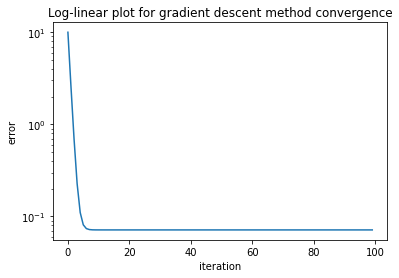

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def obj(x):
    return 5 * x[0] ** 2 + 10 * x[1] ** 2 + 12 * x[0] * x[1] - 8 * x[0] - 14 * x[1] + 5

def grad(x):
    return np.array([10 * x[0] + 12 * x[1] - 8, 20 * x[1] + 12 * x[0] - 14])

def get_x1(x):
  return 1 - 2*x[0] - 3*x[1]

init_x = [1,1]
print('initial x is: {}'.format(init_x))
lr = 0.5
total_L = []
H = np.array([[10, 12], [12, 20]])  # define the Hessian matrix


for i in range(100):
  L = obj(init_x)
  grad_x = grad(init_x)
  init_x = init_x - lr * np.matmul(np.linalg.inv(H), grad(init_x))
  total_L.append(L)
  if (i+1) % 10 == 0:
    print('steps: {}, Loss:{:.4f}, x1: {:.4f}, x2: {:.4f}, x3: {:.4f}'.format(i+1, L, get_x1(init_x), init_x[0], init_x[1]))

plt.yscale('log')
plt.plot(total_L)
plt.xlabel('iteration')
plt.ylabel('error')
plt.title('Log-linear plot for Newton method convergence')
plt.show()


**P3**

Let $H: a^Tx = c, x \in \mathbb{R^n}$ be a hyperplane. Let $x_1$ and $x_2$ be any two point on the plane, $a^Tx_1 = c$, $a^Tx_2 = c$, then $a^T(x_1 + x_2) = c$, and also $a^T(\lambda x_1 + (1-\lambda)x_2) = c$, which means $\lambda x_1 + (1-\lambda)x_2$ is a point that belongs to the hpyerplane H, thus H is convex

**P4**

\begin{equation}
\min_p \max_k {h(a^T_kp, I_t)}  \\
s.t. 0 \leq p_i \leq p_{max}
\end{equation}

a) Hessian of $h$ = $\left\{\begin{array}{cl}
2\left(I_t / I^3\right) \mathbf{a}_k \mathbf{a}_k^T & \text { if } I \leq I_t \\
\mathbf{0} & \text { if } I_t \leq I
\end{array}\right.$

since $a_k ak^T$ is positive semi-definate, the hessian of function h is convex. 

The feasible set of $p_i$ can be treated as a closed set that is a union of 2*N hyperplane, with N plane being $p_{i:n} \geq 0$ and N plane of $p_{i:n} \leq p_{max}$. Since the union of convex set is also a convex set, the feasible set here is a convex set. Thus the problem is a convex problem. 

b) The added constraint is linear in p, thus we can treat the added constraint as another hyperplane in the space p, which gives us a union of 2*N+1 hyperplane, since the union of convex set is still a convex set, the convexity of argument in a still holds, thus we will still be able to find a unique solution. 

c) the new constraint added in c is non-linear in the sense that, assume the optimal solution have p greater than 10, when we introduce the constraint in c, there can exist multiple local solutions that minimize the objective function, thus we cannot say there exist a unique solution to the problem


**P5**

define f = xy-c(x) \\
hessian of f with respect of y = 0, which is positive semi-definite, which indicate the function f is convex. We know that the maximum of a convex function is still convex, thus, the function $c*(y)$ is convex with respect of y